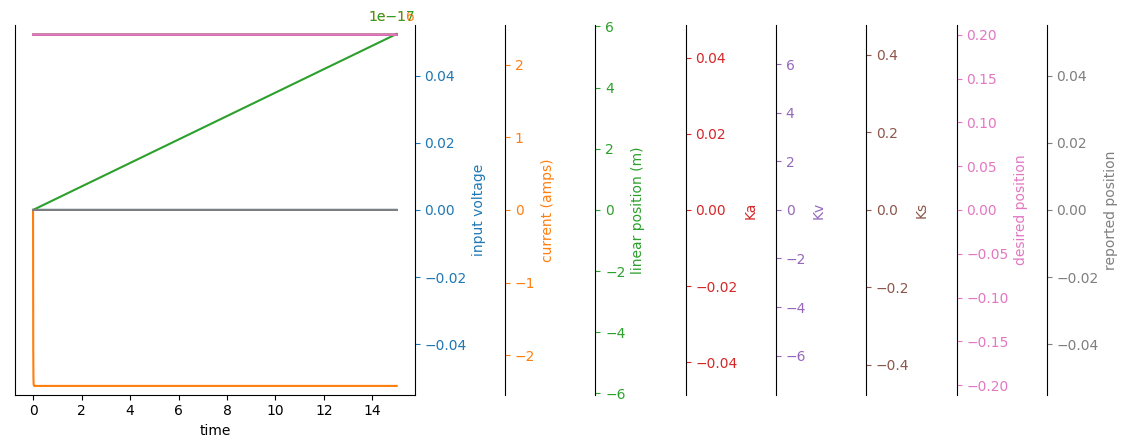

In [19]:
import csv

cutoff_time = 15

with open("extensionsim.csv") as f:
    r = csv.reader(f)
    header = next(r)
    rows = [[float(x) for x in row] for row in r]
    del rows[-1]
    for i, row in enumerate(rows):
        if row[0] >= cutoff_time:
            break
    del rows[i:]

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

ax.set(xlabel=header[0])
ax.spines[["right", "top"]].set_visible(False)
ax.yaxis.set_visible(False)

twins = [ax.twinx() for _ in header[1:]]
for i, twin in enumerate(twins):
    twin.spines[["left", "bottom", "top"]].set_visible(False)
    twin.spines.right.set_position(("outward", 65*i))

    p, = twin.plot([row[0] for row in rows], [row[i+1] for row in rows], f"C{i}", label=header[i+1])
    ymin, ymax = twin.get_ylim()
    yh = max(abs(ymin), abs(ymax))
    twin.set_ylim(-yh, yh)

    twin.set(ylabel=header[i+1])
    twin.yaxis.label.set_color(p.get_color())
    twin.tick_params(axis="y", colors=p.get_color())
plt.show()